In [27]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [23]:
data = pd.read_excel("student.xlsx")
df = data[cols[1:]]
cols =list(df.columns)
df.head()

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,4,5,4,5,5,5,5,5,Employable
1,4,4,4,4,4,4,3,5,Employable
2,4,3,3,3,3,3,2,5,LessEmployable
3,3,3,3,2,3,3,3,5,LessEmployable
4,4,4,3,3,4,4,3,5,Employable


In [24]:
df["CLASS"] = (df["CLASS"] == "Employable").astype(int) 
df.head()

C:\Users\skpra\AppData\Local\Temp\ipykernel_16440\2024151228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLASS"] = (df["CLASS"] == "Employable").astype(int)


,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,4,5,4,5,5,5,5,5,1
1,4,4,4,4,4,4,3,5,1
2,4,3,3,3,3,3,2,5,0
3,3,3,3,2,3,3,3,5,0
4,4,4,3,3,4,4,3,5,1


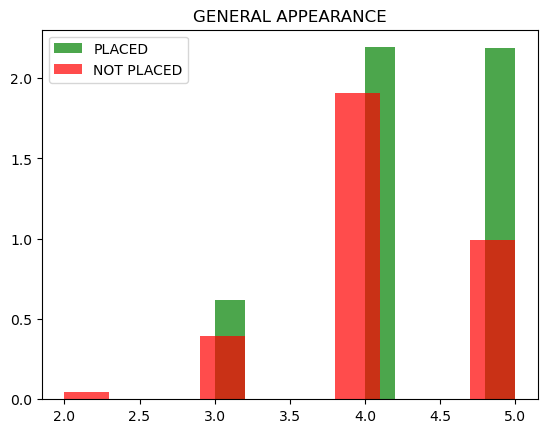

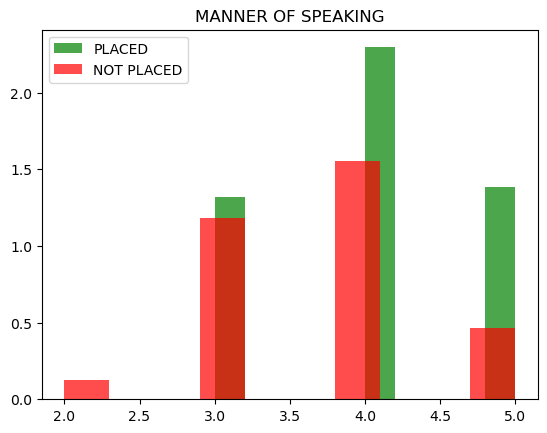

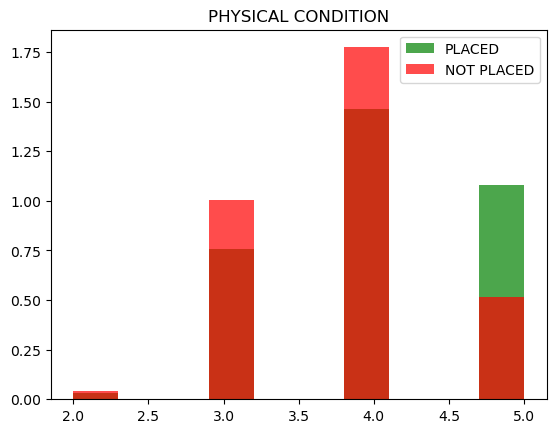

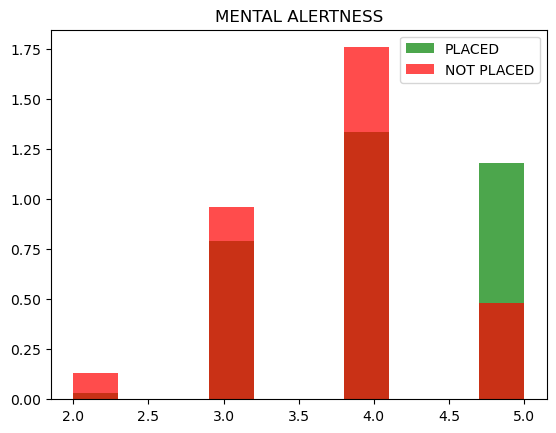

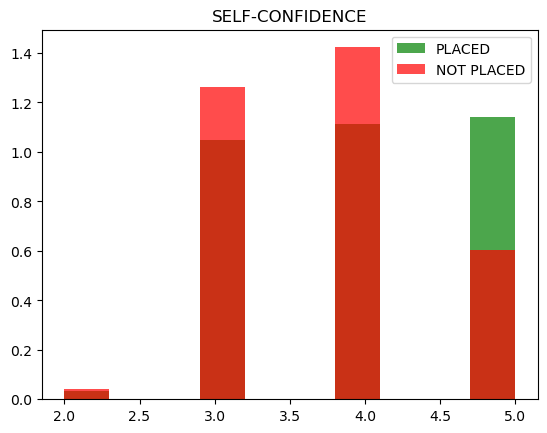

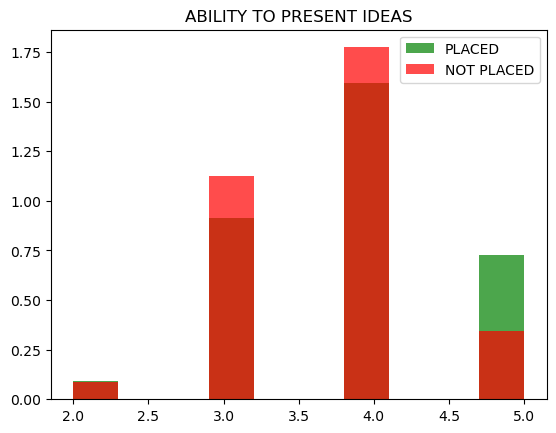

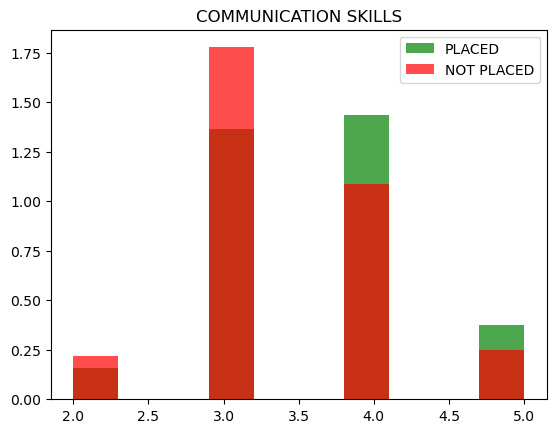

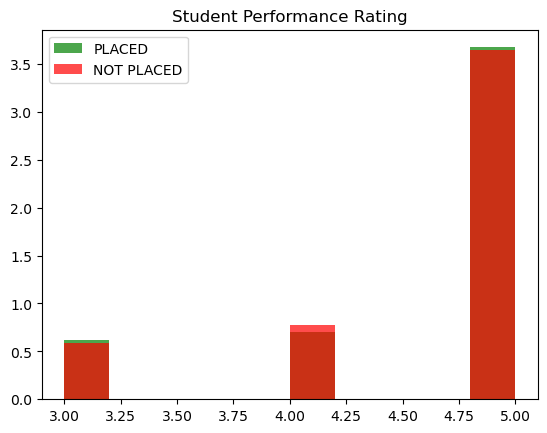

In [25]:
for label in cols[:-1]:
    plt.hist(df[df["CLASS"]==1][label] , color="green",label="PLACED",alpha = 0.7 , density=True)
    plt.hist(df[df["CLASS"]==0][label] , color="red",label="NOT PLACED",alpha = 0.7 , density=True)
    plt.legend()
    plt.title(label)
    plt.show()

In [26]:
train,valid,test = np.split(df.sample(frac=1), [int(0.6 * len(df)) , int(0.8 * len(df))])

In [28]:
def scaledata(dataframe , oversample = False):
    x = dataframe[cols[:-1]].values
    y = dataframe[cols[-1]].values

    scalar = StandardScaler()
    x = scalar.fit_transform(x)
    
    if oversample:
        ros =  RandomOverSampler()
        x,y = ros.fit_resample(x,y)

    data = np.hstack((x,np.reshape(y,(-1,1))))

    return data,x,y

In [29]:
Train, x_train, y_train = scaledata(train,oversample=True)
Test , x_test, y_test = scaledata(test)
Valid , v_valid, y_valid= scaledata(valid)

LOGISTIC REGRESSION


KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

model = KNeighborsClassifier(n_neighbors = 4)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [60]:
predict = model.predict(x_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       272
           1       0.93      0.88      0.91       325

    accuracy                           0.90       597
   macro avg       0.90      0.90      0.90       597
weighted avg       0.90      0.90      0.90       597



c:\Users\skpra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
